In [22]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from math import pi

In [3]:
T = np.array([222.4, 283.7, 331.3, 358.5, 413.0, 520.0, 1079.7])
c_p = np.array([0.762, 1.354, 1.838, 2.118, 2.661, 3.631, 5.387])

k_b = 6.02*3.297*0.1

In [4]:
def fit_func(T, theta_E):
    return 3*k_b*( (theta_E / T)**2 ) * np.exp( theta_E / T ) / ( np.exp( theta_E / T ) -1   )**2

In [5]:
params = curve_fit(fit_func, T, c_p)
theta_E = params[0]

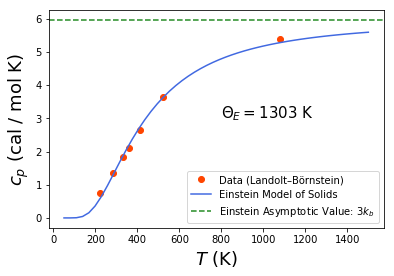

In [6]:
x = np.linspace(50, 1500)


plt.plot(T, c_p, 'o', color = 'orangered', label='Data (Landolt–Börnstein)')
plt.plot(x, fit_func(x, theta_E), color = 'royalblue', label='Einstein Model of Solids')
plt.axhline(y = 3*k_b, color = 'forestgreen',linestyle='--', label='Einstein Asymptotic Value: $3 k_b$')

plt.xlabel('$T$ (K)', fontsize=18)
plt.ylabel('$c_p$ (cal / mol K)', fontsize=18)
plt.legend(loc=4)
plt.text(800, 3,'$\Theta_E = %d$ K' % theta_E, fontsize=15)
plt.show()

In [7]:
def int_energy(T, D, J):
    num = 2*D*(np.exp(D/T) + 2*np.cosh(J/T)) - 2*J*np.sinh(J/T)
    den = 4*(np.exp(D/T) + np.cosh(J/T)) + np.exp(2*D/T)
    return  num/den 

def entropy(T, D, J):
    num = 2*D*(np.exp(D/T) + 2*np.cosh(J/T)) - 2*J*np.sinh(J/T)
    den = 4*(np.exp(D/T) + np.cosh(J/T)) + np.exp(2*D/T)
    log = (1/2)*np.log( 4*np.exp(-2*D/T)*( np.cosh(J/T) + np.exp(D/T)  ) + 1)
    return (1/T)*(num/den) + log

def q(T, D, J):
    num = 2*np.exp(-2*D/T)*( 2*np.cosh(J/T) + np.exp(D/T)  )
    den = 4*np.exp(-2*D/T)*( np.cosh(J/T) + np.exp(D/T)  ) + 1
    return num/den

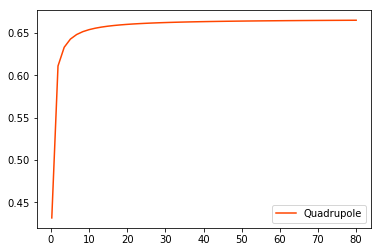

In [8]:
J = 5
D = 3

x = np.linspace(1, 400)

#plt.plot(x/J, int_energy(x, D, J), color = 'royalblue', label='Internal Energy')
#plt.plot(x/J, entropy(x, D, J), color = 'orangered', label='Entropy')
plt.plot(x/J, q(x, D, J), color = 'orangered', label='Quadrupole')
plt.legend(loc=4)
plt.show()

Other fits

In [9]:
def p(rho, beta_epsilon):
    p = -np.log(1-rho) - ( beta_epsilon / 2 )*rho*rho
    return p

In [10]:
def mu(rho, beta_epsilon):
    mu = -np.log( (1-rho) / rho ) - beta_epsilon*rho
    return mu

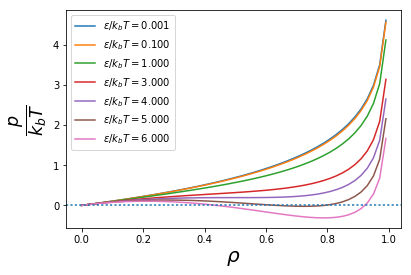

In [11]:
beta_epsilon = [0.001, 0.1, 1.0, 3.0, 4.0, 5.0, 6.0]

rho = np.linspace(0, 0.99)
for beta_epsilon in beta_epsilon:
    plt.plot(rho, p(rho,beta_epsilon), label = '$ \epsilon / k_{b} T = %.3f$' % beta_epsilon)
    
plt.xlabel(r'$ \rho $', fontsize=20)
plt.ylabel(r'$ \frac{p}{k_{b} T} $', fontsize=25)
plt.axhline(y = 0,linestyle=':')
plt.legend()
plt.show()

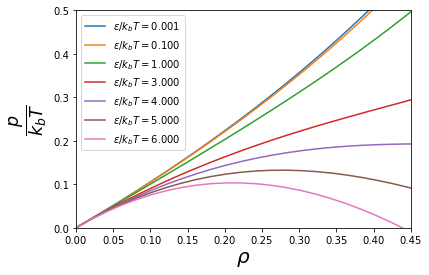

In [12]:
beta_epsilon = [0.001, 0.1, 1.0, 3.0, 4.0, 5.0, 6.0]

rho = np.linspace(0, 0.99)
for beta_epsilon in beta_epsilon:
    plt.plot(rho, p(rho,beta_epsilon), label = '$ \epsilon / k_{b} T = %.3f$' % beta_epsilon)
    
plt.xlabel(r'$ \rho $', fontsize=20)
plt.ylabel(r'$ \frac{p}{k_{b} T} $', fontsize=25)
plt.xlim([0.0, 0.45])
plt.ylim([0, 0.5])
plt.legend()
plt.show()

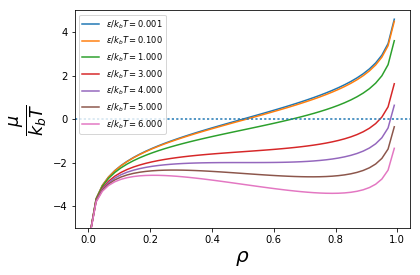

In [13]:
beta_epsilon = [0.001, 0.1, 1.0, 3.0, 4.0, 5.0, 6.0]

rho = np.linspace(0.005, 0.99)
for beta_epsilon in beta_epsilon:
    plt.plot(rho, mu(rho,beta_epsilon), label = '$ \epsilon / k_{b} T = %.3f$' % beta_epsilon)
    
plt.xlabel(r'$ \rho $', fontsize=20)
plt.ylabel(r'$ \frac{\mu}{k_{b} T} $', fontsize=25)
plt.ylim([-5,5])
plt.axhline(y = 0,linestyle=':')
plt.legend(fontsize = 'small')
plt.show()

## Question 7

3.71839765796e-08
0.0296041069333


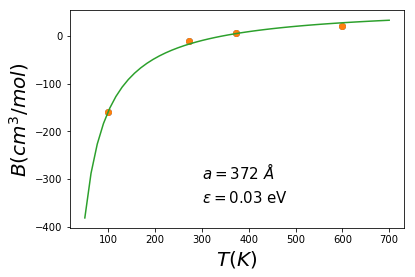

In [82]:
T = np.array([100, 273, 373, 600])
B = np.array([-160.0, -10.5, 6.2, 21.7])
plt.plot(T, B, 'o', label='Data')



def fit_func(x, a, epsilon):
    k_b = 8.6*(10**(-5))
    b = (2*pi*a*a*a / 3)*6.02* (10**(23))*(1 - (epsilon/ (k_b * x)) ) 
    return b

params = curve_fit(fit_func, T, B)
a = params[0][0]
epsilon = params[0][1]

ang = a*(10**(10))

plt.text(300, -300,'$ a = %1.f $ $\AA $' % ang, fontsize=15)
plt.text(300, -350,'$ \epsilon = %.2f $ eV' % epsilon, fontsize=15)
print(a)
print(epsilon)


x = np.linspace(50, 700)

plt.plot(T, B, 'o', label='Data')
plt.plot(x, fit_func(x, a, epsilon), label='Fit')

plt.xlabel(r'$ T (K) $', fontsize=20)
plt.ylabel(r'$ B ( cm^3 / mol  )$', fontsize=20)
plt.show()